# Pulsar Star Classification

## Introduction

When large stars die, their cores collapse in on themselves to create very dense neutron stars. The star itself shrinks in size, but its mass stays the same, causing it to spin rapidly. These spinning stars carry a magnetic field with them, and emit beams of energy from both of its poles. When we detect these beams on earth, the star appears to “pulse”, which is why these stars are often referred to as pulsars (EarthSky). Each pulsar has something called an integrated pulse profile, which is like a fingerprint; it is unique for every star. Individual pulses vary every single time they are measured, but when you average the shapes of many pulses, you can observe the characteristic pulse profile for each pulsar star (Lyne and Graham-Smith, 2012). The DM-SNR curve refers to the signal to noise ratio of the pulse. The signal is the pulse itself, what we are trying to measure, and the noise is any background signals that may be occurring. A higher signal to noise ratio means a better quality signal (Sheldon and Burke). 
The dataset we chose is called HTRU2: it provides data collected during the High Time Resolution Survey (South) about multiple stars that are candidates to be pulsars (Keith et al., 2010). Each candidate is classified as a pulsar (1) or not (0) based on 8 different continuous variables (Lyon et al., 2016). The variables found in the dataset are:


1. Mean of the integrated profile (mean of frequency of detected rotations)
2. Standard deviation of the integrated profile. (spread)
3. Excess kurtosis of the integrated profile. (outliers)
4. Skewness of the integrated profile. (distribution of the frequency’s lack of symmetry)
5. Mean of the DM-SNR curve. (mean of dispersion measure of strength of signal)
6. Standard deviation of the DM-SNR curve. (spread)
7. Excess kurtosis of the DM-SNR curve. (outliers)
8. Skewness of the DM-SNR curve. (distribution of the strength of signal’s lack of symmetry)
9. Class (whether it is a pulsar or not),
   0 = Not Pulsar, 1 = Pulsar
   
In this project we will only be using two of these variables to train a classifier and use it to predict whether a star is a pulsar or not: the mean of the integrated profile, and the mean of the DM-SNR curve. The other three columns for the integrated profile values, and the three for the DM-SNR values are just additional information that provides clarification to the mean values. When both the variables are neither high nor low compared to other values in the dataset, there is a lot of noise that makes the presence of pulsar hard to predict. In our project, we will be choosing 15 new data points within this "fuzzy" hard to predict range, and predicting whether they are pulsar or not with the appropriate k nearest neighbours.


## Methods

First, we must download the dataset in from the web. We do this by downloading the available zip file into jupyter, unzipping it, and then reading the .csv file. The dataset can be found on the UCI Machine Learning Repository at this link: https://archive.ics.uci.edu/ml/datasets/HTRU2#https://archive.ics.uci.edu/ml/datasets/HTRU2#. 

The next step is to clean and wrangle the data. As the dataset is already pretty tidy, all that must be done is to specify there are no column names present, rename the columns, and change the pulsar column to a factor type for classification.

Before we can analyse the data any further, we split it into a training and testing set. 75% training and 25% testing, stratifying each set with the pulsar column. The exploratory data analysis will be done using the training set.

In [153]:
#load the libraries #run this cell
library(tidyverse)
library(repr)
library(tidymodels)
library(digest)
library(infer)
library(cowplot)

In [191]:
#read the dataset in from the web
url<- "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"
download.file(url, "pulsar_data.zip")
unzip("pulsar_data.zip")
pulsar_data<-read_csv("HTRU_2.csv", col_names = FALSE) 

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [192]:
#rename columns and change pulsar to a factor
pulsar_data <- rename(pulsar_data, mean_integrated = X1,
      std_integrated = X2,
      excess_kurtosis_integrated = X3,
      skewness_integrated = X4,
      mean_DMSNR = X5,
      std_DMSNR = X6,
      excess_kurtosis_DMSNR = X7,
      skewness_DMSNR = X8,
      pulsar = X9) %>%
mutate(pulsar= as.factor(pulsar))
pulsar_data

mean_integrated,std_integrated,excess_kurtosis_integrated,skewness_integrated,mean_DMSNR,std_DMSNR,excess_kurtosis_DMSNR,skewness_DMSNR,pulsar
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.234571412,-0.69964840,3.1998328,19.110426,7.975532,74.24222,0
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0


In [4]:
#Split data into training and testing sets
set.seed(1234) #Set seed for reproducibility, do not change
pulsar_split <- initial_split(pulsar_data, prop = 0.75 , strata = pulsar)
pulsar_training <- training(pulsar_split)
pulsar_testing <- testing(pulsar_split)

#### Exploratory Data Analysis

The preliminary data analysis consists of two tables and one graph. The tables show the mean value of our two classifier variables for each classification: one for when the star is a pulsar, and one for when it's not. This allows us to see and compare the numerical values that define each classification. The tables are created by selecting the desired columns, filtering for the pulsar classification, and summarising the variables to get their mean values.

The graph compliments these two tables by visualising the full range of the two variables for each classification. We plot the mean of the DM-SNR curve against the mean of the integrated profile, and colour the points based on whether they are a pulsar star or not. We can see the majority of pulsar stars favor lower mean integrated profile values, which is also supported by the tables.

In [58]:
#Summarize data into two tables
data_summary_no <- pulsar_training %>%
select(mean_integrated, mean_DMSNR, pulsar) %>%
filter(pulsar== "0") %>%
summarise(mean_mean_DMSNR = mean(mean_DMSNR),
         mean_mean_integrated = mean(mean_integrated),
         pulsar = pulsar) %>%
slice(n=1)
data_summary_yes <- pulsar_training %>%
select(mean_integrated, mean_DMSNR, pulsar) %>%
filter(pulsar== "1") %>%
summarise(mean_mean_DMSNR = mean(mean_DMSNR),
         mean_mean_integrated = mean(mean_integrated),
         pulsar = pulsar) %>%
slice(n=1)

In [59]:
data_summary_no

mean_mean_DMSNR,mean_mean_integrated,pulsar
<dbl>,<dbl>,<fct>
8.994438,116.559,0


*Table 1. The mean value for the mean DM-SNR and the mean integrated profile for a non-pulsar star.*

In [7]:
data_summary_yes

mean_mean_DMSNR,mean_mean_integrated,pulsar
<dbl>,<dbl>,<fct>
49.79089,55.95948,1


*Table 2. The mean value for the mean DM-SNR and the mean integrated profile for a pulsar star.*

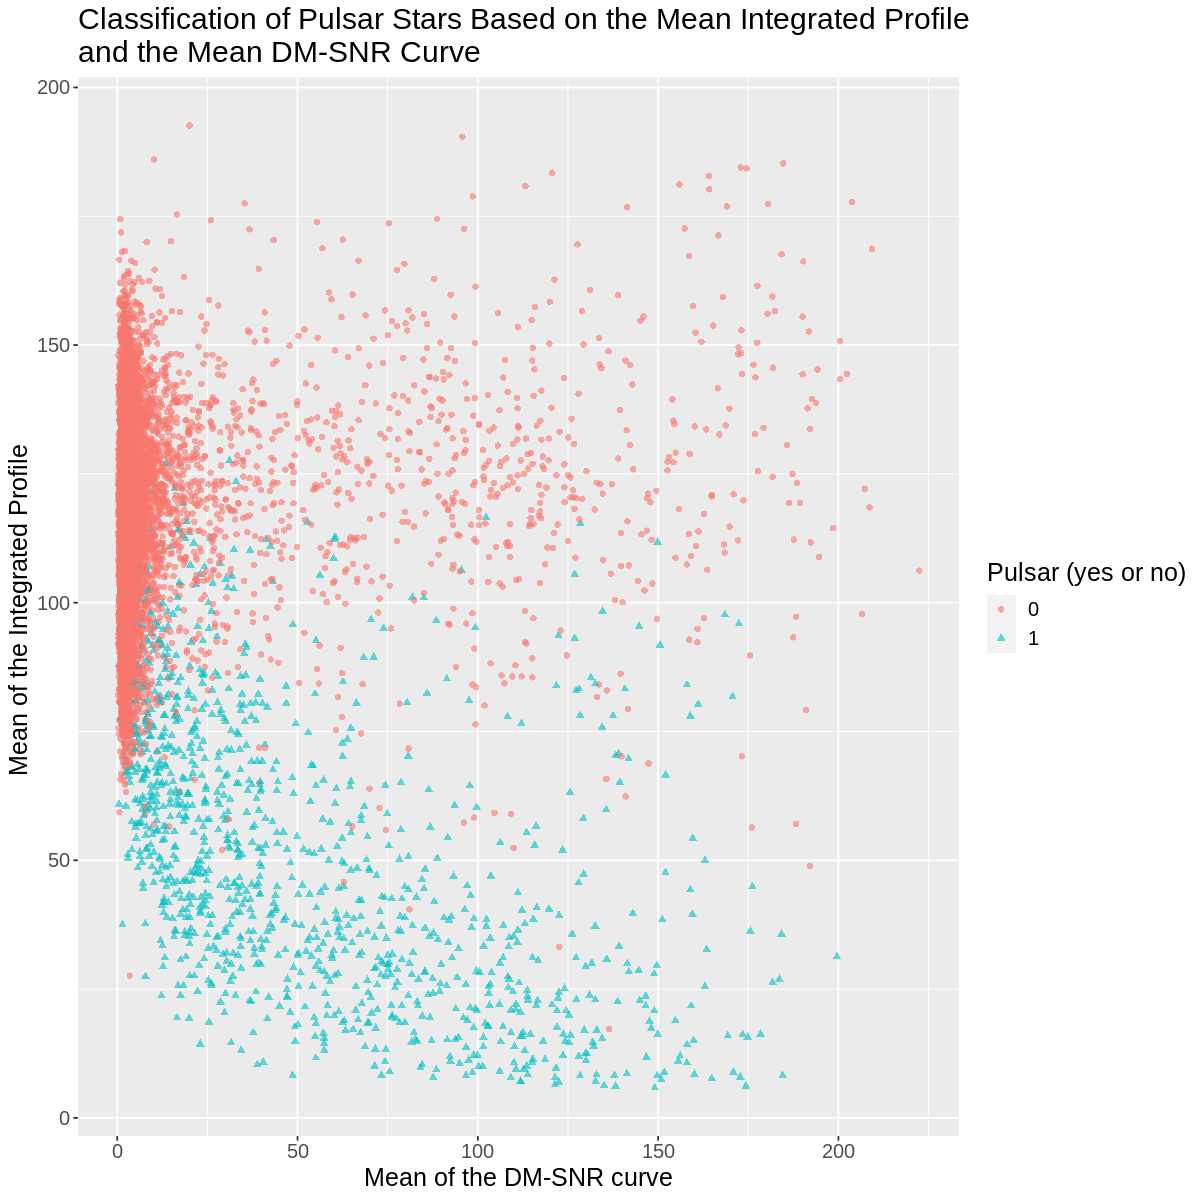

In [8]:
#Visualise dataset in a scatter plot
options(repr.plot.width=10, repr.plot.height=10)
pulsar_plot <- pulsar_training %>%
ggplot(aes(x=mean_DMSNR, y= mean_integrated, colour= pulsar, shape = pulsar)) +
geom_point(alpha = 0.6) +
labs(x="Mean of the DM-SNR curve", y= "Mean of the Integrated Profile ", 
     colour= "Pulsar (yes or no)", shape = "Pulsar (yes or no)") +
ggtitle("Classification of Pulsar Stars Based on the Mean Integrated Profile
and the Mean DM-SNR Curve") +
theme(text = element_text(size = 15))
pulsar_plot

*Figure 1. Scatter plot of the mean DM-SNR curve vs the mean integrated profile to visualise which stars are pulsar and which are not.*

#### Creating a Training Classification Model

Our classification model follows the basic principle of cross-validation, creating a recipe and a model, and then creating a workflow to determine the best number of k to use, all done on the training set. Before we do this, we assign an arbitrary number to k, k=5, to test different numbers of folds in the cross-validation. We test 5 and 10 folds to see if there is a significant enough difference in the standard deviation to warrant using 10 folds. We do this on k=5 instead of the tuning model for the sake of saving processing time, as it is a very large dataset. The results in Table 3 show that the standard deviation is actually lower with 5 folds, so that is what we will use to determine k.

In order to determine the best value for k, we create a new model specifying the number of neighbours as "tune()". We also create a new workflow with this model, and reuse the recipe that was made earlier. The recipe specifies that we are trying to predict a pulsar class with the mean integrated profile and the mean DM-SNR curve, and also scales and centers the data. In the workflow, we tune the grid by passing the 5 fold vfold data onto it, which was stratified with the pulsar column, and a tibble of possible k values from 1 to 100, skipping numbers by 5. We can then collect these metrics and filter for accuracy. The table is then arranged in descending order according to the mean, and also visualised in a line graph to determine that k=26 gives us the highest accuracy.

*A note: The dataset is quite large, so the workflow steps may take some time to run.*

In [10]:
# creating vfolds
pulsar_vfold5 <- vfold_cv(pulsar_training, v = 5, strata = pulsar)
pulsar_vfold10 <- vfold_cv(pulsar_training, v = 10, strata = pulsar)
print(pulsar_vfold5)
print(pulsar_vfold10)

#  5-fold cross-validation using stratification 
# A tibble: 5 × 2
  splits               id   
  <list>               <chr>
1 <split [10738/2685]> Fold1
2 <split [10738/2685]> Fold2
3 <split [10738/2685]> Fold3
4 <split [10739/2684]> Fold4
5 <split [10739/2684]> Fold5
#  10-fold cross-validation using stratification 
# A tibble: 10 × 2
   splits               id    
   <list>               <chr> 
 1 <split [12080/1343]> Fold01
 2 <split [12080/1343]> Fold02
 3 <split [12080/1343]> Fold03
 4 <split [12081/1342]> Fold04
 5 <split [12081/1342]> Fold05
 6 <split [12081/1342]> Fold06
 7 <split [12081/1342]> Fold07
 8 <split [12081/1342]> Fold08
 9 <split [12081/1342]> Fold09
10 <split [12081/1342]> Fold10


In [11]:
#Create a recipe and standardize the data
pulsar_recipe <- recipe(pulsar ~ mean_integrated + mean_DMSNR, data = pulsar_training)|>
step_center(all_predictors())|>
step_scale(all_predictors())
pulsar_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Centering for all_predictors()
Scaling for all_predictors()

In [16]:
#Create a kknn model for k = 5
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5)|>
            set_engine ("kknn")|>
            set_mode ("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 5
  weight_func = rectangular

Computational engine: kknn 


In [17]:
#Create workflows and collect metrics to determine what number of folds to use
knn_fit5 <- workflow()|>
           add_recipe(pulsar_recipe)|>
           add_model(knn_spec)|>
           fit_resamples(resamples = pulsar_vfold5) |>
           collect_metrics()
knn_fit10 <- workflow()|>
           add_recipe(pulsar_recipe)|>
           add_model(knn_spec)|>
           fit_resamples(resamples = pulsar_vfold10) |>
           collect_metrics()
accuracies5 <- knn_fit5 |>
  filter(.metric == "accuracy")
accuracies5
accuracies10 <- knn_fit10 |>
  filter(.metric == "accuracy")
accuracies10

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.9702749,5,0.0007002796,Preprocessor1_Model1


.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.9700517,10,0.001686516,Preprocessor1_Model1


*Table 3. Metrics for cross-validation with 5 folds and 10 folds. The accuracy is 97.0 % for both, but the standard deviation is lower for 5 folds than 10.*

In [18]:
#Create a kknn tuning model
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
            set_engine ("kknn")|>
            set_mode ("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [19]:
#Create a workflow to determine most accurate k value
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))
knn_results <- workflow()|>
           add_recipe(pulsar_recipe)|>
           add_model(knn_tune)|>
           tune_grid(resamples = pulsar_vfold5, grid = k_vals) |>
           collect_metrics()
accuracies_tune <- knn_results |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean))
accuracies_tune

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9565675,5,0.0022838899,Preprocessor1_Model01
6,accuracy,binary,0.9702749,5,0.0007002796,Preprocessor1_Model02
11,accuracy,binary,0.9716159,5,0.0012091446,Preprocessor1_Model03
16,accuracy,binary,0.9722864,5,0.0011148143,Preprocessor1_Model04
21,accuracy,binary,0.9722864,5,0.0010897983,Preprocessor1_Model05
26,accuracy,binary,0.9728823,5,0.0011266154,Preprocessor1_Model06
31,accuracy,binary,0.9724353,5,0.0010863910,Preprocessor1_Model07
36,accuracy,binary,0.9722863,5,0.0010706628,Preprocessor1_Model08
41,accuracy,binary,0.9722863,5,0.0011276829,Preprocessor1_Model09


*Table 4. Metrics for 20 k values between 1 and 100, arranged in descending order. K = 26 gives us the highest accuracy.*

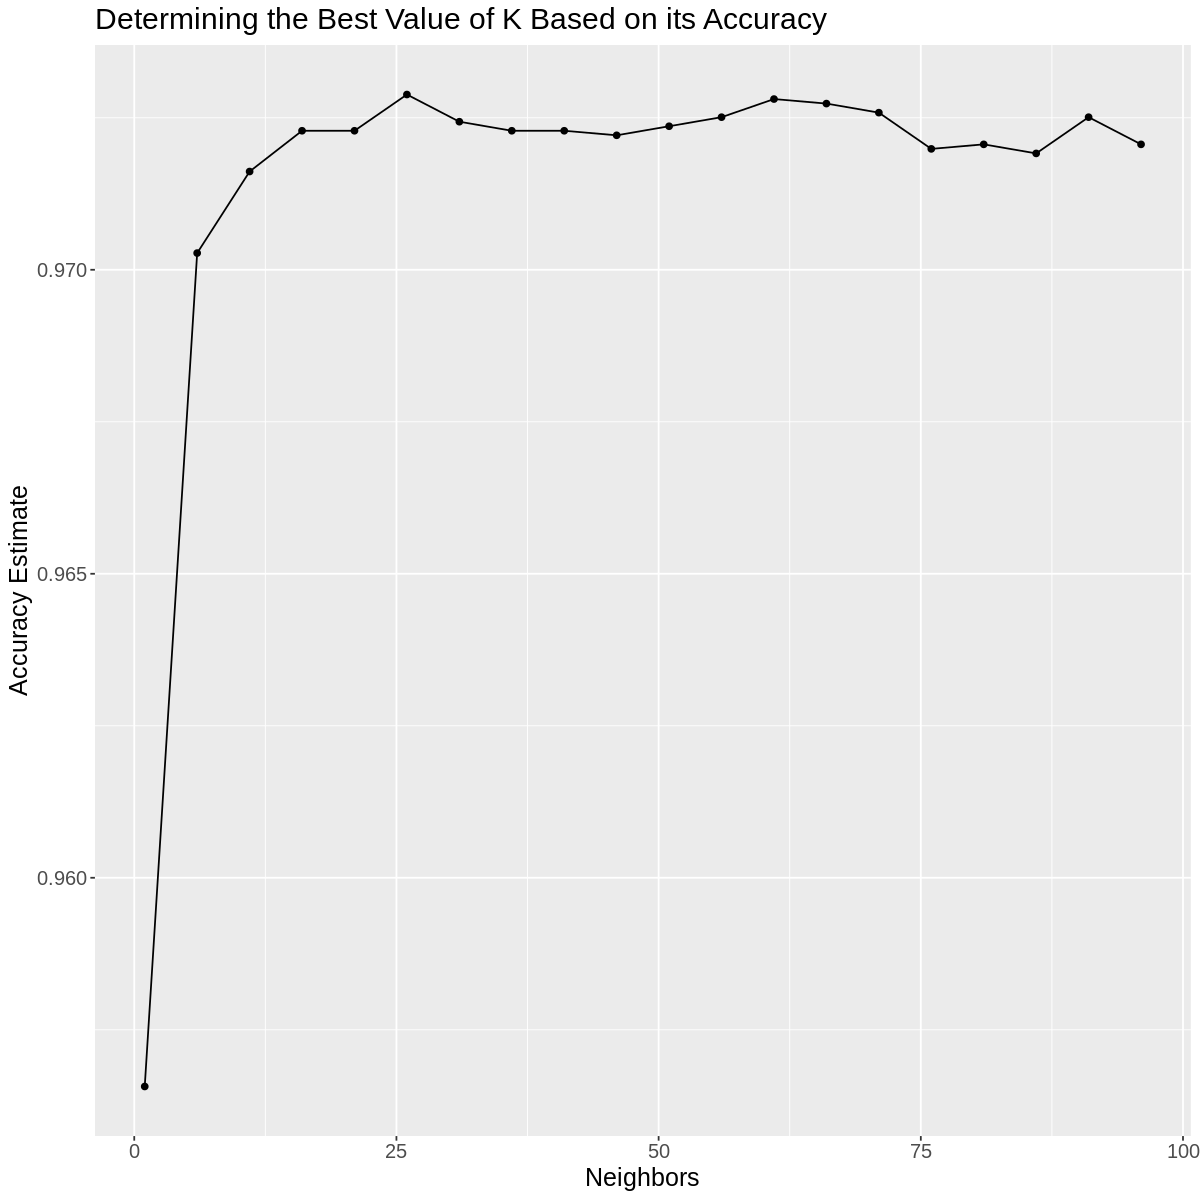

In [28]:
#Visualise the accuracies of each k value on a line plot
accuracy_vs_k <- ggplot(accuracies_tune, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 15)) +
  ggtitle("Determining the Best Value of K Based on its Accuracy")
accuracy_vs_k

*Figure 2. Graph plotting the k values against their accuracies. The graph shows that k = 26 gives the highest accuracy.*

#### Creating a Testing Classification Model

In order to create the testing model, we repeat the steps done earlier. A new model is made to specify the number of neighbours as 26, then a new recipe using the testing set. These are combined into a workflow and fitted, once again passing the testing set into R. We can now evaluate the accuracy of our model by getting it to predict the pulsar classes of the testing set data. The new predicted class column is then binded to the initial testing data set so we can visualise them side by side and perform further analysis. We collect the accuracy by specifying the pulsar column as truth and the predicted class column as the estimate, which gives us an accuracy of 97.2%, as seen in table 4. We can visualise this accuracy even further by creating a confusion matrix (Figure 3), which tells us that out of all of the available data points, 4350 of them were predicted correctly, and 125 were not. For our purposes, an accuracy of 97.2% is adequate, so we move on to predicting new data points.

In [29]:
#Create a kknn model for k = 26
knn_spec26 <- nearest_neighbor(weight_func = "rectangular", neighbors = 26)|>
            set_engine ("kknn")|>
            set_mode ("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 5
  weight_func = rectangular

Computational engine: kknn 


In [ ]:
#Create a new recipe with the testing data
pulsar_recipe_test <- recipe(pulsar ~ mean_integrated + mean_DMSNR, data = pulsar_training)|>
step_center(all_predictors())|>
step_scale(all_predictors())
pulsar_recipe

In [138]:
#Create a workflow
knn_fit26 <- workflow()|>
           add_recipe(pulsar_recipe_test)|>
           add_model(knn_spec26)|>
           fit(data = pulsar_testing)         

In [139]:
#Predict the classes of pulsar in the testing set
pulsar_predictions <- predict(knn_fit26, pulsar_testing) |>
  bind_cols(pulsar_testing)

pulsar_predictions

.pred_class,mean_integrated,std_integrated,excess_kurtosis_integrated,skewness_integrated,mean_DMSNR,std_DMSNR,excess_kurtosis_DMSNR,skewness_DMSNR,pulsar
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,103.01562,39.34165,0.32332837,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
0,88.72656,40.67223,0.60086608,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
0,130.38281,39.84406,-0.15832276,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
0,107.25781,39.49649,0.46588196,1.16287712,4.0794314,24.980418,7.397080,57.78474,0
0,142.07812,45.28807,-0.32032843,0.28395251,5.3762542,29.009897,6.076266,37.83139,0
0,133.25781,44.05824,-0.08105986,0.11536151,1.6321070,12.007806,11.972067,195.54345,0
0,134.96094,49.55433,-0.13530383,-0.08046960,10.6964883,41.342044,3.893934,14.13121,0
0,136.09375,51.69100,-0.04590893,-0.27181639,9.3428094,38.096400,4.345438,18.67365,0
0,99.36719,41.57220,1.54719697,4.15410604,27.5551839,61.719016,2.208808,3.66268,1


In [140]:
#Determine the classifier accuracy
pulsar_predictions|>
metrics(truth = pulsar, estimate = .pred_class)|>
filter( .metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.972067


*Table 4. Accuracy of the predicted class compared to the testing set pulsar classifiers.*

In [141]:
#Create a confusion matrix to show correct predictions
correct_predictions <- pulsar_predictions|>
                     conf_mat(truth = pulsar, estimate = .pred_class)
correct_predictions

          Truth
Prediction    0    1
         0 4042   96
         1   29  308

*Figure 3. Confusion matrix showing number of correctly predicted non-pulsar stars (0,0) and pulsar stars (1,1). It also shows the number of falsely predicted non-pulsar stars (0,1), and falsely predicted pulsar stars (1,0).*

#### Classifying New Data

In the introduction, we specified we wanted to create and predict new data points that fell in the "fuzzy in between" zone of the two variables. Lets look at Table 1 and 2 one more time to remind ourselves where those values should lie:

In [142]:
data_summary_no

mean_mean_DMSNR,mean_mean_integrated,pulsar
<dbl>,<dbl>,<fct>
8.994438,116.559,0


In [143]:
data_summary_yes

mean_mean_DMSNR,mean_mean_integrated,pulsar
<dbl>,<dbl>,<fct>
49.79089,55.95948,1


We want to pick values that lie between the two mean DM-SNR values, so 8.99 - 49. 79, and ones that lie between the mean integrated values, 55.95 - 116.56. We will choose 15 points with a random number generator and predict their classification using our model. The model is modified to use the whole dataset instead of just the testing set, and we predict the class for each data point. 

In [144]:
#Create the new observations
new_obs1 <- tibble(mean_integrated = 62.23196, mean_DMSNR = 36.99510)
new_obs2 <- tibble(mean_integrated = 97.43732, mean_DMSNR = 48.85187)
new_obs3 <- tibble(mean_integrated = 116.05518, mean_DMSNR = 11.49827)
new_obs4 <- tibble(mean_integrated = 57.78642, mean_DMSNR = 28.21588)
new_obs5 <- tibble(mean_integrated = 113.12879, mean_DMSNR = 13.31157)
new_obs6 <- tibble(mean_integrated = 68.28766, mean_DMSNR = 24.98331)
new_obs7 <- tibble(mean_integrated = 80.83224, mean_DMSNR = 45.25825)
new_obs8 <- tibble(mean_integrated = 101.64209, mean_DMSNR = 15.84505)
new_obs9 <- tibble(mean_integrated = 75.64588, mean_DMSNR = 43.36435)
new_obs10 <- tibble(mean_integrated = 108.74858, mean_DMSNR = 18.95470)
new_obs11 <- tibble(mean_integrated = 88.80480, mean_DMSNR = 26.34048)
new_obs12 <- tibble(mean_integrated = 86.97871, mean_DMSNR = 36.11872)
new_obs13 <- tibble(mean_integrated = 77.78631, mean_DMSNR = 11.36793)
new_obs14 <- tibble(mean_integrated = 91.04419, mean_DMSNR = 31.29981)
new_obs15 <- tibble(mean_integrated = 60.01790, mean_DMSNR = 21.35862)

In [145]:
#Create a new model with k = 26 and the original dataset
pulsar_recipe_final <- recipe(pulsar ~ mean_integrated + mean_DMSNR, data = pulsar_data)|>
step_center(all_predictors())|>
step_scale(all_predictors())
knn_fit_final <- workflow()|>
           add_recipe(pulsar_recipe_test)|>
           add_model(knn_spec26)|>
           fit(data = pulsar_data) 

In [146]:
#Predict the new classes
pulsar_predict1 <- predict(knn_fit_final, new_obs1)
pulsar_predict2 <- predict(knn_fit_final, new_obs2)
pulsar_predict3 <- predict(knn_fit_final, new_obs3)
pulsar_predict4 <- predict(knn_fit_final, new_obs4)
pulsar_predict5 <- predict(knn_fit_final, new_obs5)
pulsar_predict6 <- predict(knn_fit_final, new_obs6)
pulsar_predict7 <- predict(knn_fit_final, new_obs7)
pulsar_predict8 <- predict(knn_fit_final, new_obs8)
pulsar_predict9 <- predict(knn_fit_final, new_obs9)
pulsar_predict10 <- predict(knn_fit_final, new_obs10)
pulsar_predict11 <- predict(knn_fit_final, new_obs11)
pulsar_predict12 <- predict(knn_fit_final, new_obs12)
pulsar_predict13 <- predict(knn_fit_final, new_obs13)
pulsar_predict14 <- predict(knn_fit_final, new_obs14)
pulsar_predict15 <- predict(knn_fit_final, new_obs15)
pulsar_predict1 
pulsar_predict2 
pulsar_predict3 
pulsar_predict4 
pulsar_predict5 
pulsar_predict6
pulsar_predict7 
pulsar_predict8 
pulsar_predict9 
pulsar_predict10 
pulsar_predict11 
pulsar_predict12
pulsar_predict13
pulsar_predict14 
pulsar_predict15 

.pred_class
<fct>
1


.pred_class
<fct>
0


.pred_class
<fct>
0


.pred_class
<fct>
1


.pred_class
<fct>
0


.pred_class
<fct>
1


.pred_class
<fct>
1


.pred_class
<fct>
0


.pred_class
<fct>
1


.pred_class
<fct>
0


.pred_class
<fct>
0


.pred_class
<fct>
1


.pred_class
<fct>
1


.pred_class
<fct>
0


.pred_class
<fct>
1


#### Visualizing the Results

To visualise our classifier model, we take the testing set bound with the predicted class column and create a couple scatter plots with it. The first plot shows the known classification for each star, while the second plot shows the predicted classification (Figure 4). We show them side by side so they can be compared.

We also visualise the new observations and their predictions in Figure 5. We do this by taking the known classification plot from Figure 4, adding the new data points, coloring them based on their class, and increasing their size so they can be easily identified.

In [173]:
#Plotting the actual classification results of the testing set
pulsar_values <- pulsar_predictions |>
                select(mean_DMSNR, mean_integrated, pulsar)

final_plot_truth <- ggplot(pulsar_values, aes(x = mean_DMSNR, y = mean_integrated, color = pulsar, shape = pulsar ) )+
              geom_point(alpha = 0.6) + 
    labs(x="Mean of the DM-SNR curve", y= "Mean of the Integrated Profile ", 
     colour= "Pulsar (yes or no)", shape = "Pulsar (yes or no)") +
     ggtitle("Classification of Pulsar Stars Based on the Mean Integrated Profile
    and the Mean DM-SNR Curve - Actual Classification") +
    theme(text = element_text(size = 15))

In [172]:
#Plotting the predicted classification results of the testing set
pulsar_predict <- pulsar_predictions |>
                select(mean_DMSNR, mean_integrated, .pred_class)

final_plot_predict <- ggplot(pulsar_predict, aes(x = mean_DMSNR, y = mean_integrated, color = .pred_class, shape = .pred_class ))+
              geom_point(alpha = 0.6) + 
    labs(x="Mean of the DM-SNR curve", y= "Mean of the Integrated Profile ", 
     colour= "Pulsar (yes or no)", shape = "Pulsar (yes or no)") +
     ggtitle("Classification of Pulsar Stars Based on the Mean Integrated Profile
    and the Mean DM-SNR Curve - Predicted Classification") +
    theme(text = element_text(size = 15))

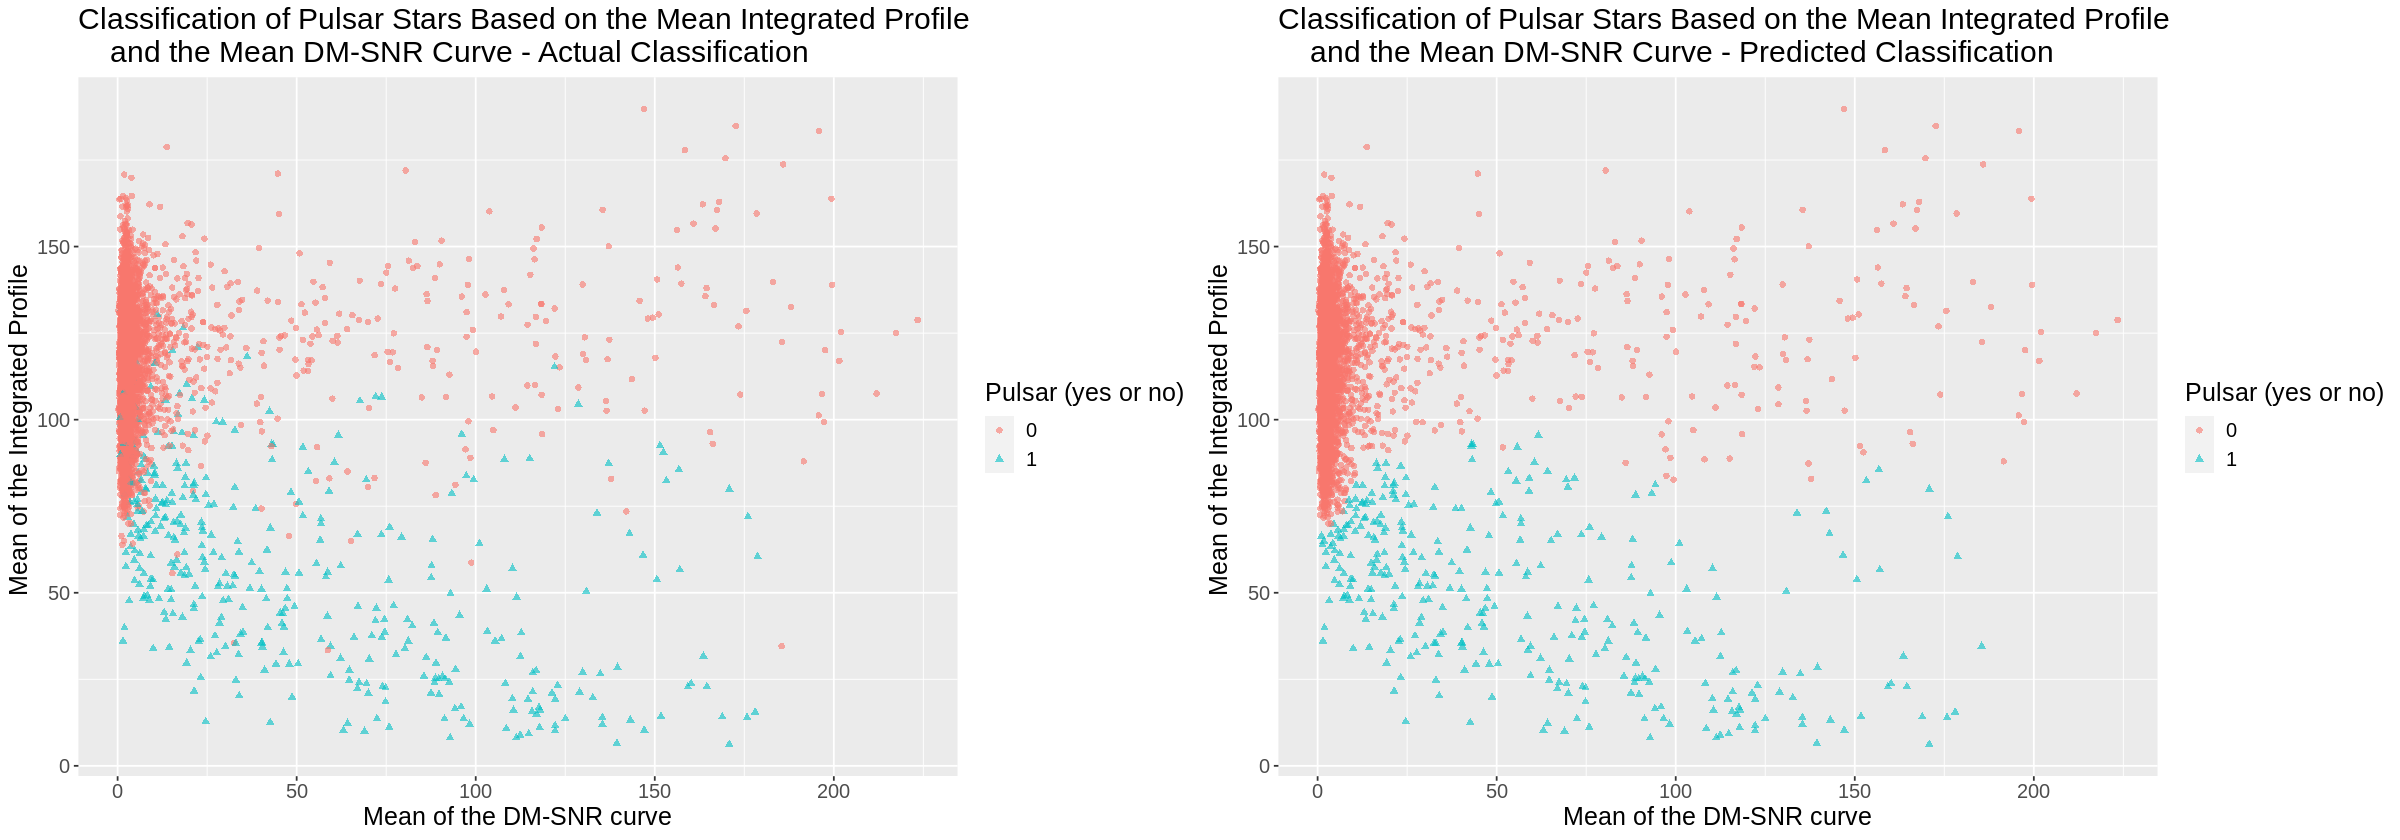

In [171]:
options(repr.plot.width = 20, repr.plot.height = 7)
plot_grid(final_plot_truth, final_plot_predict, ncol = 2)

*Figure 4. Scatter plots of the mean of the DM-SNR curve vs the mean of the integrated profile for both the actual classes and the predicted classes of pulsar stars*

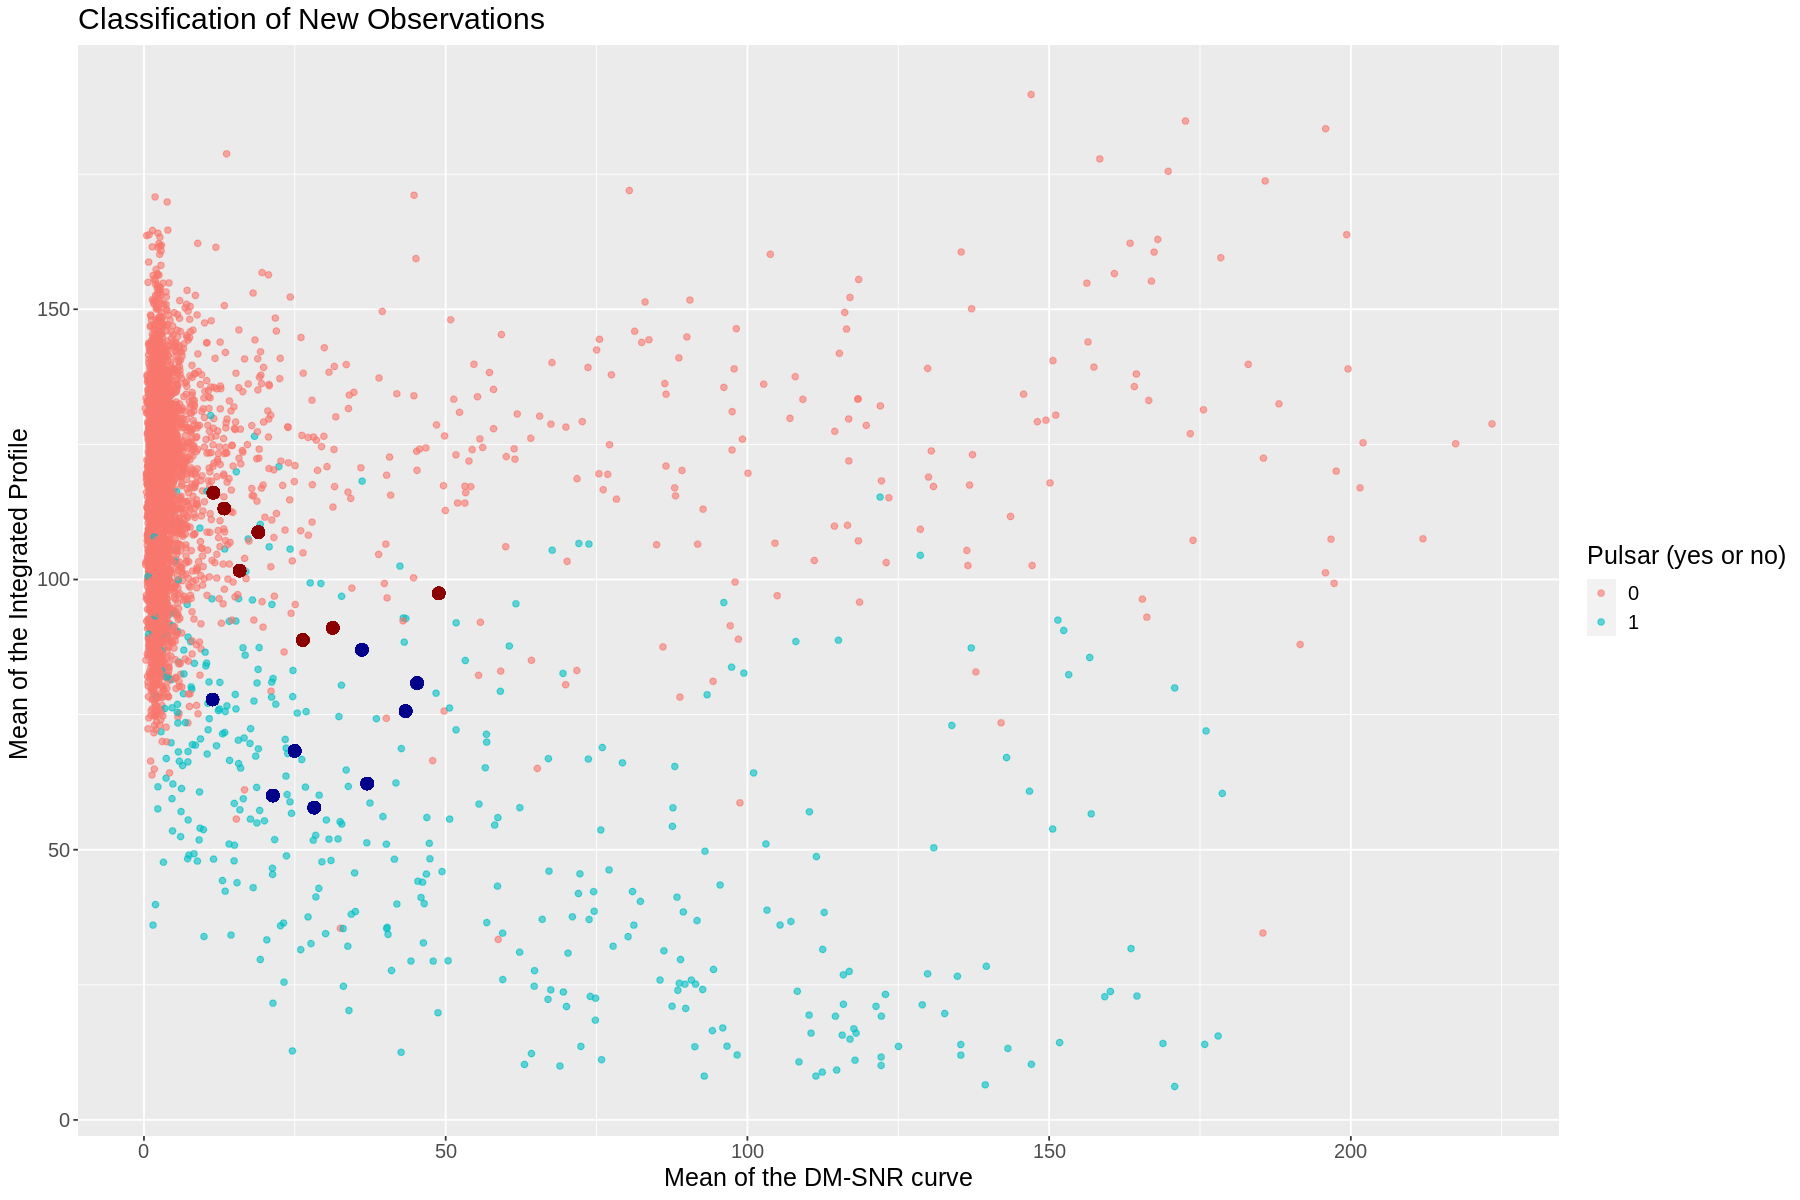

In [189]:
#Plotting the new data points on the initial scatterplot
options(repr.plot.width = 15, repr.plot.height = 10)
final_plot <- ggplot(pulsar_values, aes(x = mean_DMSNR, y = mean_integrated, color = pulsar) )+
              geom_point(alpha = 0.6) + 
geom_point(aes(y = 62.23196, x = 36.99510), color = "dark blue", size = 3) +
geom_point(aes(y = 97.43732, x = 48.85187), color = "dark red", size = 3) +
geom_point(aes(y = 116.05518, x = 11.49827), color = "dark red", size = 3) +
geom_point(aes(y = 57.78642, x = 28.21588), color = "dark blue", size = 3) +
geom_point(aes(y = 113.12879, x = 13.31157), color = "dark red", size = 3) +
geom_point(aes(y = 68.28766, x = 24.98331), color = "dark blue", size = 3) +
geom_point(aes(y = 80.83224, x = 45.25825), color = "dark blue", size = 3) +
geom_point(aes(y =101.64209, x = 15.84505), color = "dark red", size = 3) +
geom_point(aes(y = 75.64588, x = 43.36435), color = "dark blue", size = 3) +
geom_point(aes(y = 108.74858, x = 18.95470), color = "dark red", size = 3) +
geom_point(aes(y =  88.80480, x = 26.34048), color = "dark red", size = 3) +
geom_point(aes(y = 86.97871, x = 36.11872), color = "dark blue", size = 3) +
geom_point(aes(y = 77.78631, x = 11.36793), color = "dark blue", size = 3) +
geom_point(aes(y = 91.04419, x = 31.29981), color = "dark red", size = 3) +
geom_point(aes(y = 60.01790, x = 21.35862), color = "dark blue", size = 3) +
    labs(x="Mean of the DM-SNR curve", y= "Mean of the Integrated Profile ", 
     colour= "Pulsar (yes or no)") +
     ggtitle("Classification of New Observations") +
    theme(text = element_text(size = 15)) 
final_plot

*Figure 5. Scatter plot showing the new predictions. Dark blue represents a pulsar star, and dark red represents a non-pulsar star.*

## Discussion

We set out to predict 15 new data points that lay in the "fuzzy" overlap zone between the two classes. If we take a look at Figure 4, this overlap zone can be seen in the  actual classifications plot. Comparing this zone to the predicted classification plots, we can see that the classifier has smoothed out this zone of uncertainty and essentially split them into their seperate categories. This is where the classifier lacks accuracy, and why we could not get an accuracy higher than 97%. Out of the 15 new observations, 8 were predicted to be pulsar, and 7 to be non-pulsar. This can be seen in Figure 5, which also shows that the new predictions also follow the seperation previously mentioned in Figure 4. Since the new observations are in an uncertain zone, we expect the distribution of classes to be around 50/50, which is exactly what our results show. 

Using a model with a high accuracy like this one could be very useful in the classification of other potential pulsar candidates. It would allow scientists to take the data they have collected and use it identify pulsar stars. It might especially be useful in helping identify pulsar stars that do not have clear classifications based on the collected data, just as we have done in our classifier. Even a model with a lower accuracy could have scientific applications. If an estimate of the amount of pulsar stars in an area of the sky is needed, it could be predicted with the classification model without having to individually confirm each stars identity. 

Classifiers like this provide more available data to work with, and more options on how to analyse it. Having more data to work with opens the possibilities to ask new questions in the field. They may provide insights to previously unanswered questions and broaden our understanding of pulsar stars.



### References

  Keith, M. J., Jameson, A., Van Straten, W., Bailes, M., Johnston, S., Kramer, M., Possenti, A., Bates, S. D., Bhat, N. D., Burgay, M., Burke-Spolaor, S., D'Amico, N., Levin, L., McMahon, P. L., Milia, S., &amp; Stappers, B. W. (2010). The high time resolution universe pulsar survey - I. system configuration and initial discoveries. Monthly Notices of the Royal Astronomical Society, 409(2), 619–627. https://doi.org/10.1111/j.1365-2966.2010.17325.x 

  Lyne, A., &amp; Graham-Smith, F. (2012). 15 integrated Pulse Profiles. Pulsar Astronomy, 207–229. https://doi.org/10.1017/cbo9780511844584.016 

  Lyon, R. J., Stappers, B. W., Cooper, S., Brooke, J. M., &amp; Knowles, J. D. (2016). Fifty Years of pulsar candidate selection: From simple filters to a new principled real-time classification approach. Monthly Notices of the Royal Astronomical Society, 459(1), 1104–1123. https://doi.org/10.1093/mnras/stw656 

  R. J. Lyon, HTRU2, DOI: 10.6084/m9.figshare.3080389.v1.
    
  What's a pulsar and why does it pulse? EarthSky. (2022, July 15). Retrieved December 7, 2022, from https://earthsky.org/space/what-is-a-pulsar/ 
